## 项目案例1: 优化约会网站的配对效果  
https://ailearning.apachecn.org/#/docs/ml/2.KNN  

In [32]:
from numpy import *

In [33]:
def file2matrix(filename):
    """
    Desc:
        导入训练数据
    parameters:
        filename: 数据文件路径
    return: 
        数据矩阵 returnMat 和对应的类别 classLabelVector
    """
    fr = open(filename)
    # 获得文件中的数据行的行数
    numberOfLines = len(fr.readlines())
    # 生成对应的空矩阵
    # 例如：zeros(2，3)就是生成一个 2*3的矩阵，各个位置上全是 0 
    returnMat = zeros((numberOfLines, 3))  # prepare matrix to return
    classLabelVector = []  # prepare labels return
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        # str.strip([chars]) --返回已移除字符串头尾指定字符所生成的新字符串
        line = line.strip()
        # 以 '\t' 切割字符串
        listFromLine = line.split('\t')
        # 每列的属性数据
        returnMat[index, :] = listFromLine[0:3]
        # 每列的类别数据，就是 label 标签数据
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    # 返回数据矩阵returnMat和对应的类别classLabelVector
    return returnMat, classLabelVector

In [34]:
datingDataMat, datingLabels = file2matrix("datingTestSet.txt")
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

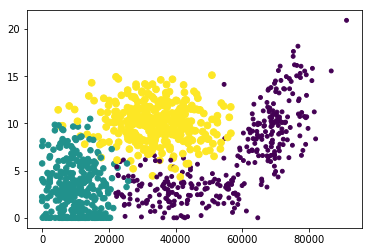

In [35]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()
%matplotlib inline

In [36]:
def autoNorm(dataSet):
    """
    Desc:
        归一化特征值，消除特征之间量级不同导致的影响
    parameter:
        dataSet: 数据集
    return:
        归一化后的数据集 normDataSet. ranges和minVals即最小值与范围，并没有用到

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - tile(minVals, (m, 1))  # #在行方向上重复minVals m次，列1次
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / tile(ranges, (m, 1))  # element wise divide
    return normDataSet, ranges, minVals

kNN 算法伪代码：

对于每一个在数据集中的数据点：  
1.计算目标的数据点（需要分类的数据点）与该数据点的距离  
2.将距离排序：从小到大  
3.选取前K个最短距离  
4.选取这K个中最多的分类类别  
5.返回该类别来作为目标数据点的预测值  

In [42]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #距离度量 度量公式为欧氏距离
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5

    #将距离排序：从小到大
    sortedDistIndicies = distances.argsort()
    #选取前K个最短距离， 选取这K个中最多的分类类别
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [43]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [44]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])